In [1]:
import pickle
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from math import sqrt
import math
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from sklearn.model_selection import GridSearchCV
pd.set_option('float_format', '{:f}'.format)

In [2]:
#! pip install textblob

# LISTING CALENDARS

In [3]:
B_calendar = pd.read_csv("Bcalendar.csv")

In [4]:
B_calendar.shape

(1308890, 4)

In [5]:
B_calendar.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


In [6]:
B_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [7]:
def Get_year(list_) :
    text_ =  list_.date[0:4]
    return text_   

In [8]:
def Get_month(list_) :
    text_1 =  list_.date[5:7]
    return text_1   

In [9]:
def Get_day(list_) :
    text_2 =  list_.date[8:10]
    return text_2   

In [10]:
def dollar_sign_removal(list_) :
    modified_string =  str(list_.price).replace("$", "")
    return modified_string   

In [11]:
B_calendar['year'] = B_calendar.apply(Get_year,axis=1) 

In [12]:
B_calendar['month'] = B_calendar.apply(Get_month,axis=1) 

In [13]:
B_calendar['day'] = B_calendar.apply(Get_day,axis=1) 

In [14]:
B_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
year          object
month         object
day           object
dtype: object

In [15]:
B_calendar.year.value_counts()

2017    889328
2016    419562
Name: year, dtype: int64

In [16]:
B_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [17]:
B_calendar['price'] = B_calendar.apply(dollar_sign_removal,axis=1) 

In [18]:
B_calendar.head(2)

,listing_id,date,available,price,year,month,day
0,12147973,2017-09-05,f,nan,2017,09,05
1,12147973,2017-09-04,f,nan,2017,09,04


In [19]:
percent_missing = B_calendar.isnull().sum() * 100 / len(B_calendar)
missing_value_df = pd.DataFrame({'column_name': B_calendar.columns,
                                 'percent_missing': percent_missing})

In [20]:
missing_value_df

,column_name,percent_missing
listing_id,listing_id,0.000000
date,date,0.000000
available,available,0.000000
price,price,0.000000
year,year,0.000000
month,month,0.000000
day,day,0.000000


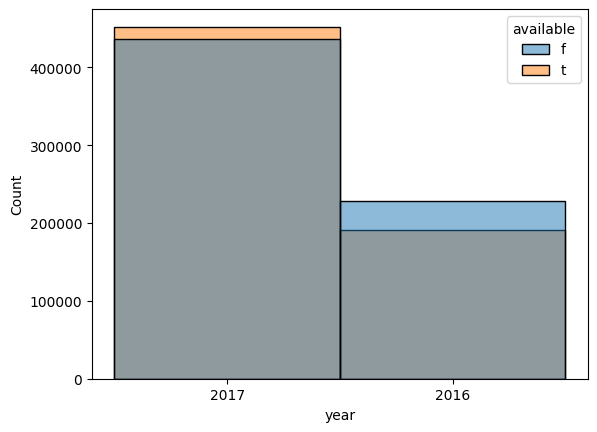

In [21]:
sns.histplot(B_calendar, x='year', binwidth=10, hue='available');

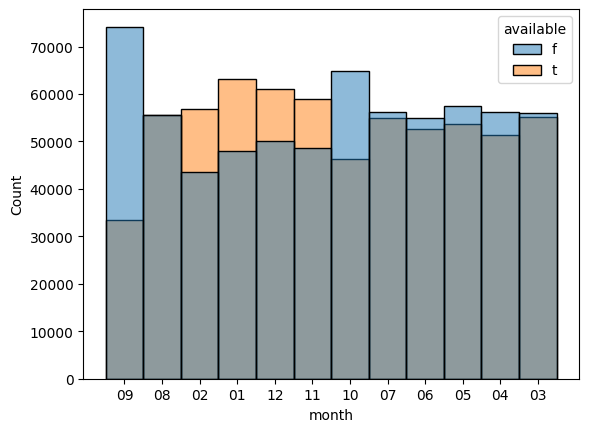

In [22]:
sns.histplot(B_calendar, x='month', binwidth=10, hue='available');

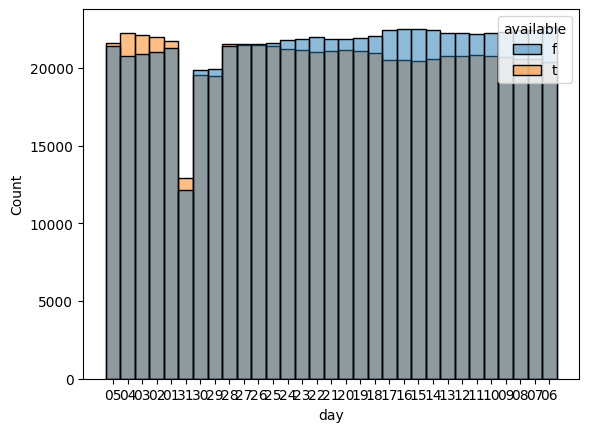

In [23]:
sns.histplot(B_calendar, x='day', binwidth=10, hue='available');

In [24]:
B_calendar['price'].value_counts()

nan         665853
150.00       20752
65.00        17518
75.00        16249
100.00       15499
             ...  
2,717.00         1
3,051.00         1
3,314.00         1
1,843.00         1
1,888.00         1
Name: price, Length: 1247, dtype: int64

In [25]:
B_calendar['price'] = B_calendar['price'].replace('nan', '0')

In [26]:
B_calendar['price'] = B_calendar['price'].str.replace(',', '')

In [27]:
B_calendar['price'] = B_calendar['price'].astype(float)

<Axes: xlabel='month'>

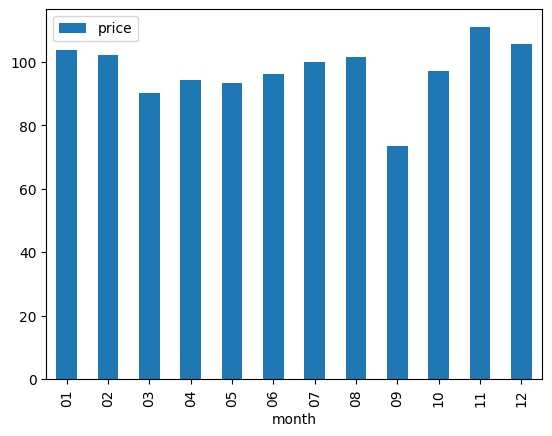

In [28]:
B_calendar[['price','month']].groupby("month").mean().plot(kind="bar")

<Axes: xlabel='day'>

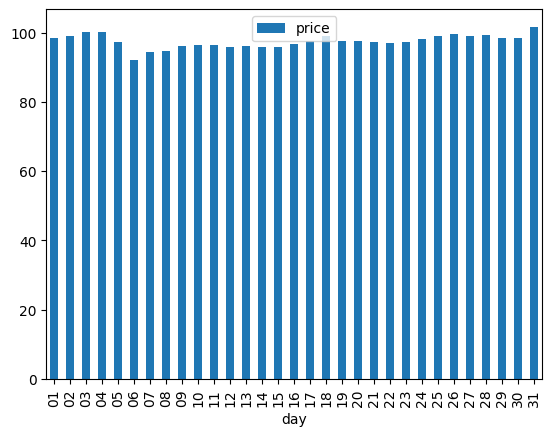

In [29]:
B_calendar[['price','day']].groupby("day").mean().plot(kind="bar")

In [30]:
B_calendar.describe()

,listing_id,price
count,1308890.000000,1308890.000000
mean,8442117.776352,97.489904
std,4500148.919019,160.575211
min,3353.000000,0.000000
25%,4679319.000000,0.000000
50%,8578709.500000,0.000000
75%,12796034.000000,150.000000
max,14933461.000000,7163.000000


In [31]:
B_calendar[(B_calendar.available=='f') & (B_calendar.price>0)].shape

(0, 7)

In [32]:
B_calendar['day'] = B_calendar['day'].astype(int)

In [33]:
B_calendar['month'] = B_calendar['month'].astype(int)

In [34]:
B_calendar.drop(['listing_id'],axis=1).corr()['price']

price   1.000000
month   0.005850
day     0.004005
Name: price, dtype: float64

In [35]:
B_calendar['day_month'] = B_calendar['day']+ B_calendar['month'] 

In [36]:
B_calendar.drop(['listing_id'],axis=1).corr()['price']

price       1.000000
month       0.005850
day         0.004005
day_month   0.005840
Name: price, dtype: float64

In [37]:
#B_calendar['price_2'] = B_calendar['price']*B_calendar['price']

In [38]:
B_calendar.drop(['listing_id'],axis=1).corr()['price']

price       1.000000
month       0.005850
day         0.004005
day_month   0.005840
Name: price, dtype: float64

In [39]:
B_listings = pd.read_csv("Blistings.csv")

In [40]:
B_listings.shape

(3585, 95)

In [41]:
percent_missing = B_listings.isnull().sum() * 100 / len(B_listings)
missing_value_df = pd.DataFrame({'column_name': B_listings.columns,
                                 'percent_missing': percent_missing})

In [42]:
missing_value_df[missing_value_df.percent_missing==0]

,column_name,percent_missing
id,id,0.000000
listing_url,listing_url,0.000000
scrape_id,scrape_id,0.000000
last_scraped,last_scraped,0.000000
name,name,0.000000
description,description,0.000000
experiences_offered,experiences_offered,0.000000
picture_url,picture_url,0.000000
host_id,host_id,0.000000
host_url,host_url,0.000000


In [43]:
missing_value_df[(missing_value_df.percent_missing< 40) & (missing_value_df.percent_missing> 0)]

,column_name,percent_missing
summary,summary,3.988842
space,space,29.483961
neighborhood_overview,neighborhood_overview,39.470014
transit,transit,35.983264
house_rules,house_rules,33.249651
thumbnail_url,thumbnail_url,16.708508
medium_url,medium_url,16.708508
xl_picture_url,xl_picture_url,16.708508
host_location,host_location,0.306834
host_about,host_about,36.513250


In [44]:
B_listings_copy = B_listings[['id','host_listings_count','is_location_exact','room_type','accommodates','bed_type','price','guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated','availability_30','availability_60','availability_90','availability_365','number_of_reviews','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','property_type','bathrooms','bedrooms','beds','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]

In [45]:
to_remove_dollar_sign = ['price','extra_people','cleaning_fee']
for item in to_remove_dollar_sign :
    B_listings_copy[item] = B_listings_copy[item].str.replace(',', '')
    B_listings_copy[item] = B_listings_copy[item].str.replace('$', '')
    B_listings_copy[item] = B_listings_copy[item].replace('NaN', '0')
    B_listings_copy[item] = B_listings_copy[item].astype(float)

In [46]:
B_listings_copy.head(2)

,id,host_listings_count,is_location_exact,room_type,accommodates,bed_type,price,guests_included,extra_people,minimum_nights,...,beds,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,12147973,1,t,Entire home/apt,4,Real Bed,250.000000,1,0.000000,2,...,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,1,t,Private room,2,Real Bed,65.000000,0,0.000000,2,...,1.000000,10.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.300000


In [47]:
numerical_columns = B_listings_copy.select_dtypes(include=['number'])

# Displaying the numerical columns
print(list(numerical_columns))

['id', 'host_listings_count', 'accommodates', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'calculated_host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [48]:
B_listings_copy_nums = B_listings_copy[list(numerical_columns)]

In [49]:
B_listings_copy_cats = B_listings_copy.drop(list(numerical_columns),axis=1)

In [50]:
B_listings_copy_cats['id'] = B_listings_copy['id']

In [51]:
B_listings_copy_cats

,is_location_exact,room_type,bed_type,calendar_updated,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,property_type,id
0,t,Entire home/apt,Real Bed,2 weeks ago,f,f,f,f,House,12147973
1,t,Private room,Real Bed,a week ago,f,t,f,f,Apartment,3075044
2,t,Private room,Real Bed,5 days ago,f,f,t,f,Apartment,6976
3,f,Private room,Real Bed,a week ago,f,f,f,f,House,1436513
4,t,Private room,Real Bed,2 weeks ago,f,f,f,f,House,7651065
...,...,...,...,...,...,...,...,...,...,...
3580,t,Private room,Real Bed,5 days ago,f,t,f,f,Apartment,8373729
3581,f,Private room,Real Bed,never,f,f,f,f,Apartment,14844274
3582,f,Entire home/apt,Real Bed,3 weeks ago,f,f,f,f,Apartment,14585486
3583,t,Private room,Real Bed,today,f,f,f,f,Apartment,14603878


In [52]:
B_listings_copy_nums.describe().drop("id",axis=1)#.to_csv("B_listings_copy_nums_describe.csv")

,host_listings_count,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,beds,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3576.000000,2478.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,58.902371,3.041283,173.925802,1.429847,10.886192,3.171269,28725.836820,8.649930,21.833194,38.558159,...,1.609060,68.380145,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,171.119663,1.778929,148.331321,1.056787,19.137773,8.874133,1670135.937686,10.435330,21.860966,33.158272,...,1.011745,51.297835,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,1.000000,2.000000,85.000000,1.000000,0.000000,1.000000,365.000000,0.000000,0.000000,0.000000,...,1.000000,25.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,2.000000,2.000000,150.000000,1.000000,0.000000,2.000000,1125.000000,4.000000,16.000000,37.000000,...,1.000000,50.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,7.000000,4.000000,220.000000,1.000000,20.000000,3.000000,1125.000000,15.000000,40.000000,68.000000,...,2.000000,100.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,749.000000,16.000000,4000.000000,14.000000,200.000000,300.000000,99999999.000000,30.000000,60.000000,90.000000,...,16.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


In [53]:
B_listings_copy_nums.describe().drop("id",axis=1)

,host_listings_count,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,beds,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3576.000000,2478.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,58.902371,3.041283,173.925802,1.429847,10.886192,3.171269,28725.836820,8.649930,21.833194,38.558159,...,1.609060,68.380145,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,171.119663,1.778929,148.331321,1.056787,19.137773,8.874133,1670135.937686,10.435330,21.860966,33.158272,...,1.011745,51.297835,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,1.000000,2.000000,85.000000,1.000000,0.000000,1.000000,365.000000,0.000000,0.000000,0.000000,...,1.000000,25.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,2.000000,2.000000,150.000000,1.000000,0.000000,2.000000,1125.000000,4.000000,16.000000,37.000000,...,1.000000,50.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,7.000000,4.000000,220.000000,1.000000,20.000000,3.000000,1125.000000,15.000000,40.000000,68.000000,...,2.000000,100.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,749.000000,16.000000,4000.000000,14.000000,200.000000,300.000000,99999999.000000,30.000000,60.000000,90.000000,...,16.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


In [54]:
percent_missing = B_listings_copy_nums.isnull().sum() * 100 / len(B_listings_copy_nums)
missing_value_nums = pd.DataFrame({'column_name': B_listings_copy_nums.columns,
                                 'percent_missing': percent_missing})

In [55]:
percent_missing = B_listings_copy_cats.isnull().sum() * 100 / len(B_listings_copy_cats)
missing_value_cats = pd.DataFrame({'column_name': B_listings_copy_cats.columns,
                                 'percent_missing': percent_missing})

In [56]:
missing_value_cats

,column_name,percent_missing
is_location_exact,is_location_exact,0.000000
room_type,room_type,0.000000
bed_type,bed_type,0.000000
calendar_updated,calendar_updated,0.000000
requires_license,requires_license,0.000000
instant_bookable,instant_bookable,0.000000
require_guest_profile_picture,require_guest_profile_picture,0.000000
require_guest_phone_verification,require_guest_phone_verification,0.000000
property_type,property_type,0.083682
id,id,0.000000


In [57]:
missing_value_nums

,column_name,percent_missing
id,id,0.000000
host_listings_count,host_listings_count,0.000000
accommodates,accommodates,0.000000
price,price,0.000000
guests_included,guests_included,0.000000
extra_people,extra_people,0.000000
minimum_nights,minimum_nights,0.000000
maximum_nights,maximum_nights,0.000000
availability_30,availability_30,0.000000
availability_60,availability_60,0.000000


In [58]:
B_listings_copy_nums = B_listings_copy_nums.drop_duplicates()

In [59]:
B_listings_copy_nums.bathrooms = B_listings_copy_nums.bathrooms.fillna(B_listings_copy_nums.bathrooms.mean())

In [60]:
B_listings_copy_nums.bedrooms = B_listings_copy_nums.bedrooms.fillna(B_listings_copy_nums.bedrooms.mean())

In [61]:
B_listings_copy_nums.beds = B_listings_copy_nums.beds.fillna(B_listings_copy_nums.beds.mean())

In [62]:
B_listings_copy_nums = B_listings_copy_nums.fillna(0)

In [63]:
#sns.set_style('whitegrid');
#sns.pairplot(B_listings_copy_nums,  height=3);
#plt.show()

In [64]:
#import dython
#from dython.nominal import associations
#from dython.nominal import identify_nominal_columns
#categorical_features = identify_nominal_columns(B_listings_copy_nums.drop("id",axis=1))

#associations(B_listings_copy_nums.drop("id",axis=1), 
#            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  
#            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
#            compute_only=False, clustering=False, title=None, filename=None, 
#            figsize=(15,15));

In [65]:
B_listings_copy_nums = B_listings_copy_nums[['id','accommodates','host_listings_count','guests_included','availability_30','availability_60','calculated_host_listings_count','bathrooms','bedrooms','beds','cleaning_fee','price']]

In [66]:
num_cat_data = B_listings_copy_cats.merge(B_listings_copy_nums,on="id")

In [67]:
num_cat_data.shape

(3585, 21)

In [68]:
num_cat_data

,is_location_exact,room_type,bed_type,calendar_updated,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,property_type,id,...,host_listings_count,guests_included,availability_30,availability_60,calculated_host_listings_count,bathrooms,bedrooms,beds,cleaning_fee,price
0,t,Entire home/apt,Real Bed,2 weeks ago,f,f,f,f,House,12147973,...,1,1,0,0,1,1.500000,2.000000,3.000000,35.000000,250.000000
1,t,Private room,Real Bed,a week ago,f,t,f,f,Apartment,3075044,...,1,0,26,54,1,1.000000,1.000000,1.000000,10.000000,65.000000
2,t,Private room,Real Bed,5 days ago,f,f,t,f,Apartment,6976,...,1,1,19,46,1,1.000000,1.000000,1.000000,0.000000,65.000000
3,f,Private room,Real Bed,a week ago,f,f,f,f,House,1436513,...,1,2,6,16,1,1.000000,1.000000,2.000000,50.000000,75.000000
4,t,Private room,Real Bed,2 weeks ago,f,f,f,f,House,7651065,...,1,1,13,34,1,1.500000,1.000000,2.000000,15.000000,79.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,t,Private room,Real Bed,5 days ago,f,t,f,f,Apartment,8373729,...,28,1,21,51,8,1.000000,1.000000,1.000000,0.000000,69.000000
3581,f,Private room,Real Bed,never,f,f,f,f,Apartment,14844274,...,2,1,29,59,2,1.000000,1.000000,1.000000,15.000000,150.000000
3582,f,Entire home/apt,Real Bed,3 weeks ago,f,f,f,f,Apartment,14585486,...,1,1,0,15,1,1.000000,1.000000,1.000000,0.000000,198.000000
3583,t,Private room,Real Bed,today,f,f,f,f,Apartment,14603878,...,4,1,5,5,1,1.000000,1.000000,1.000000,0.000000,65.000000


In [69]:
num_cat_data.dtypes

is_location_exact                    object
room_type                            object
bed_type                             object
calendar_updated                     object
requires_license                     object
instant_bookable                     object
require_guest_profile_picture        object
require_guest_phone_verification     object
property_type                        object
id                                    int64
accommodates                          int64
host_listings_count                   int64
guests_included                       int64
availability_30                       int64
availability_60                       int64
calculated_host_listings_count        int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
cleaning_fee                        float64
price                               float64
dtype: object

<Axes: xlabel='room_type'>

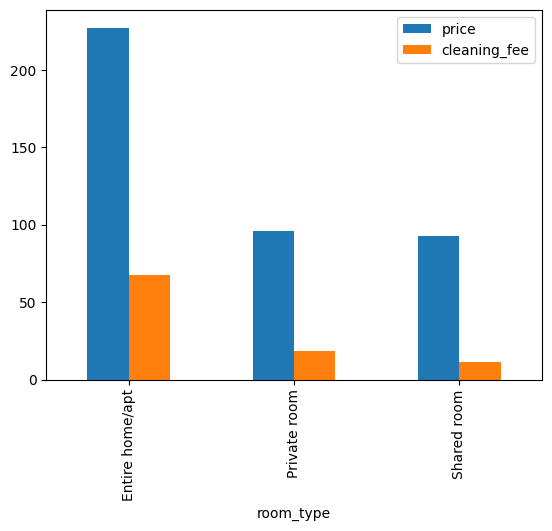

In [70]:
num_cat_data[['price','cleaning_fee','room_type']].groupby("room_type").mean().plot(kind="bar")
#sns.histplot(num_cat_data, x='room_type',y='price');

<Axes: xlabel='bed_type'>

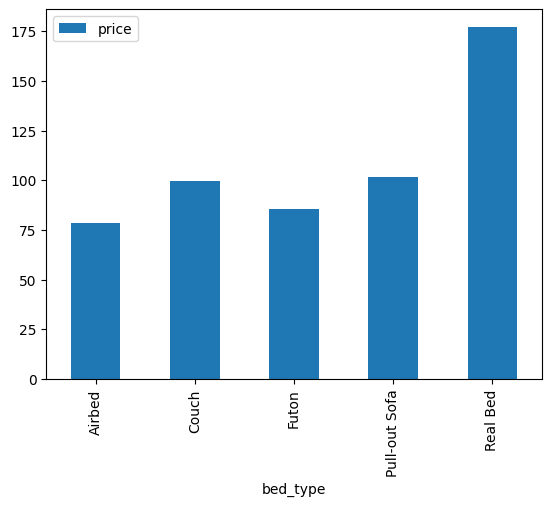

In [71]:
num_cat_data[['price','bed_type']].groupby("bed_type").mean().plot(kind="bar")

<Axes: xlabel='calendar_updated'>

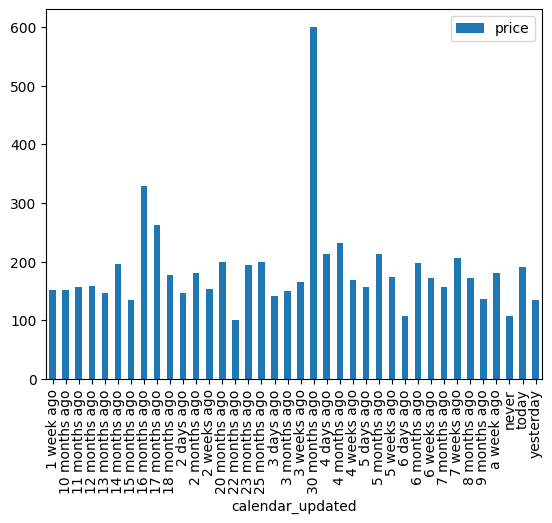

In [72]:
num_cat_data[['price','calendar_updated']].groupby("calendar_updated").mean().plot(kind="bar")

<Axes: xlabel='property_type'>

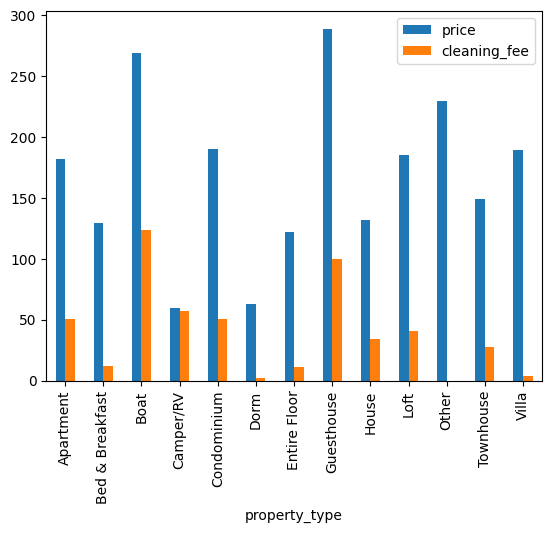

In [73]:
num_cat_data[['price','cleaning_fee','property_type']].groupby("property_type").mean().plot(kind="bar")

<Axes: xlabel='room_type,property_type'>

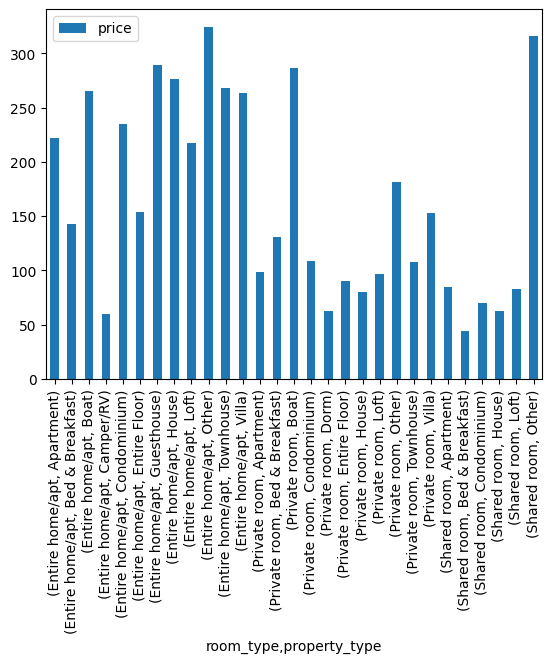

In [74]:
num_cat_data[['property_type','room_type','bed_type','price']].groupby(['room_type','property_type']).mean().plot(kind="bar")

<Axes: xlabel='property_type,room_type'>

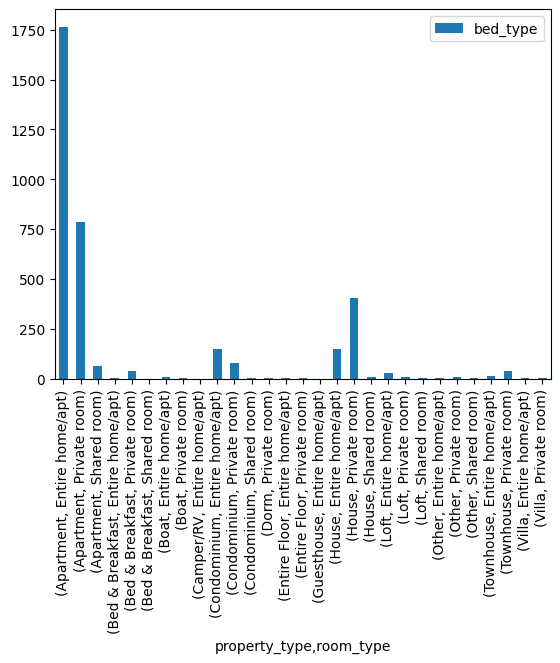

In [75]:
num_cat_data[['property_type','room_type','bed_type']].groupby(['property_type','room_type']).count().plot(kind="bar")

In [76]:
ohe_num_cat_data = pd.get_dummies(data=num_cat_data, columns=list(B_listings_copy_cats.drop("id",axis=1)))  

In [77]:
ohe_num_cat_data.shape

(3585, 80)

In [78]:
ohe_num_cat_data

,id,accommodates,host_listings_count,guests_included,availability_30,availability_60,calculated_host_listings_count,bathrooms,bedrooms,beds,...,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,12147973,4,1,1,0,0,1,1.500000,2.000000,3.000000,...,0,0,0,0,0,1,0,0,0,0
1,3075044,2,1,0,26,54,1,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
2,6976,2,1,1,19,46,1,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,1436513,4,1,2,6,16,1,1.000000,1.000000,2.000000,...,0,0,0,0,0,1,0,0,0,0
4,7651065,2,1,1,13,34,1,1.500000,1.000000,2.000000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,3,28,1,21,51,8,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
3581,14844274,2,2,1,29,59,2,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
3582,14585486,4,1,1,0,15,1,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
3583,14603878,2,4,1,5,5,1,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [79]:
ohe_num_cat_data.drop("id",axis=1).corr()['price'].to_csv("correlations_2.csv")

In [80]:
ohe_num_cat_data_final = ohe_num_cat_data[['id','accommodates','host_listings_count','guests_included','availability_30','availability_60','calculated_host_listings_count','bathrooms','bedrooms','beds','cleaning_fee','price','room_type_Entire home/apt','bed_type_Real Bed','require_guest_phone_verification_t']]

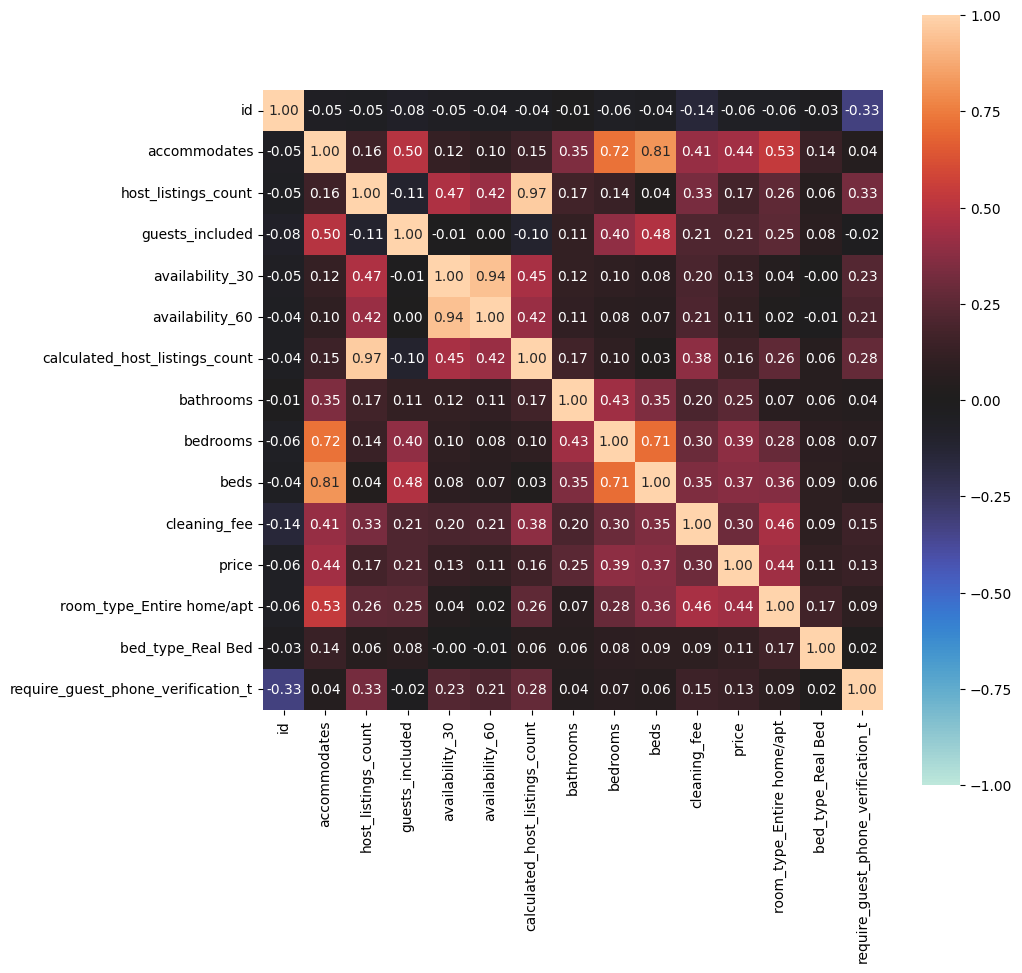

In [157]:
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features = identify_nominal_columns(ohe_num_cat_data_final)

associations(ohe_num_cat_data_final, 
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
            compute_only=False, clustering=False, title=None, filename=None, 
            figsize=(10,10));

In [82]:
X = ohe_num_cat_data_final.drop('price',axis=1)

In [83]:
y = ohe_num_cat_data_final['price']

In [84]:
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [85]:
train_X, test_X, train_Y, test_Y = train_test_split(data_transformed,y, test_size = 0.2,random_state=2)

In [86]:
rf = RandomForestRegressor(n_estimators = 400, max_features = 'log2', max_depth = 7, random_state = 18)
rf.fit(train_X, train_Y)
pred_train_rr= rf.predict(train_X)
pred_test_rr= rf.predict(test_X)

In [87]:

print('MAE - Training :',metrics.mean_absolute_error(train_Y,pred_train_rr))
print('R2 - Training :',r2_score(train_Y, pred_train_rr))
print('-------------------------')
print('MAE - Test :',metrics.mean_absolute_error(test_Y,pred_test_rr))
print('R2 - Test :',r2_score(test_Y, pred_test_rr))

MAE - Training : 47.0498181558304
R2 - Training : 0.5758999309478978
-------------------------
MAE - Test : 59.14888506402143
R2 - Test : 0.2602974852206701


In [88]:
list(X.columns)

['id',
 'accommodates',
 'host_listings_count',
 'guests_included',
 'availability_30',
 'availability_60',
 'calculated_host_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'room_type_Entire home/apt',
 'bed_type_Real Bed',
 'require_guest_phone_verification_t']

In [89]:
list(rf.feature_importances_)

[0.07226251403153787,
 0.11760026089827459,
 0.0374514496183985,
 0.0357395457938858,
 0.048715596918109616,
 0.07872545365056674,
 0.03414026462917116,
 0.0822528075922445,
 0.11765345845619897,
 0.07324013643952676,
 0.11509047047626612,
 0.17790093211160243,
 0.0018451965901961347,
 0.007381912794020993]

In [90]:
tuples = list(zip(X.columns, rf.feature_importances_))

In [91]:
tuples

[('id', 0.07226251403153787),
 ('accommodates', 0.11760026089827459),
 ('host_listings_count', 0.0374514496183985),
 ('guests_included', 0.0357395457938858),
 ('availability_30', 0.048715596918109616),
 ('availability_60', 0.07872545365056674),
 ('calculated_host_listings_count', 0.03414026462917116),
 ('bathrooms', 0.0822528075922445),
 ('bedrooms', 0.11765345845619897),
 ('beds', 0.07324013643952676),
 ('cleaning_fee', 0.11509047047626612),
 ('room_type_Entire home/apt', 0.17790093211160243),
 ('bed_type_Real Bed', 0.0018451965901961347),
 ('require_guest_phone_verification_t', 0.007381912794020993)]

In [92]:
cols = list(X.columns)

In [93]:
cols

['id',
 'accommodates',
 'host_listings_count',
 'guests_included',
 'availability_30',
 'availability_60',
 'calculated_host_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'room_type_Entire home/apt',
 'bed_type_Real Bed',
 'require_guest_phone_verification_t']

In [94]:
#df = pd.DataFrame(tuples, columns=cols)

In [95]:
B_calendar.rename(columns={'listing_id': 'id','price':'date_price'}, inplace=True)

In [96]:
calendar_listings = B_calendar.merge(ohe_num_cat_data_final,on="id")

In [97]:
calendar_listings.shape

(1308890, 22)

In [98]:
calendar_listings.head(5)

,id,date,available,date_price,year,month,day,day_month,accommodates,host_listings_count,...,availability_60,calculated_host_listings_count,bathrooms,bedrooms,beds,cleaning_fee,price,room_type_Entire home/apt,bed_type_Real Bed,require_guest_phone_verification_t
0,12147973,2017-09-05,f,0.000000,2017,9,5,14,4,1,...,0,1,1.500000,2.000000,3.000000,35.000000,250.000000,1,1,0
1,12147973,2017-09-04,f,0.000000,2017,9,4,13,4,1,...,0,1,1.500000,2.000000,3.000000,35.000000,250.000000,1,1,0
2,12147973,2017-09-03,f,0.000000,2017,9,3,12,4,1,...,0,1,1.500000,2.000000,3.000000,35.000000,250.000000,1,1,0
3,12147973,2017-09-02,f,0.000000,2017,9,2,11,4,1,...,0,1,1.500000,2.000000,3.000000,35.000000,250.000000,1,1,0
4,12147973,2017-09-01,f,0.000000,2017,9,1,10,4,1,...,0,1,1.500000,2.000000,3.000000,35.000000,250.000000,1,1,0


In [99]:
calendar_listings_copy = calendar_listings[calendar_listings.available=='t'].drop(['id','date','available'],axis=1)
calendar_listings_copy.corr()['date_price']

date_price                           1.000000
month                                0.054220
day                                  0.006490
day_month                            0.026026
accommodates                         0.483006
host_listings_count                  0.293521
guests_included                      0.230147
availability_30                      0.192528
availability_60                      0.173237
calculated_host_listings_count       0.275777
bathrooms                            0.252253
bedrooms                             0.431941
beds                                 0.396152
cleaning_fee                         0.332813
price                                0.879527
room_type_Entire home/apt            0.488482
bed_type_Real Bed                    0.121650
require_guest_phone_verification_t   0.105589
Name: date_price, dtype: float64

<Axes: >

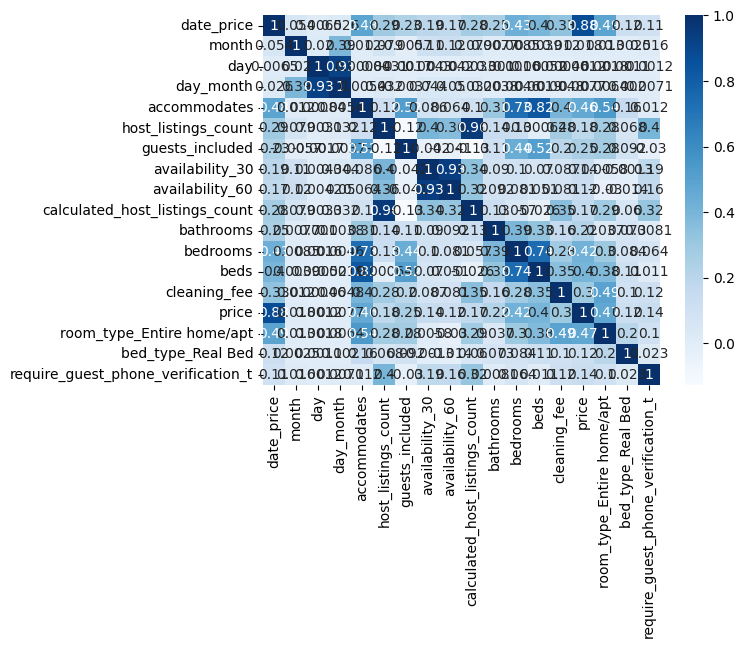

In [155]:
import seaborn as sb
corr = calendar_listings_copy.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [100]:
X = calendar_listings_copy.drop('date_price',axis=1)

In [101]:
y = calendar_listings_copy['date_price']

In [102]:
train_X, test_X, train_Y, test_Y = train_test_split(X,y, test_size = 0.2,random_state=2)

In [103]:
rf = RandomForestRegressor(n_estimators = 400, max_features = 'log2', max_depth = 7, random_state = 18)
rf.fit(train_X, train_Y)
pred_train_rr= rf.predict(train_X)
pred_test_rr= rf.predict(test_X)

In [104]:
print('MAE - Training :',metrics.mean_absolute_error(train_Y,pred_train_rr))
print('R2 - Training :',r2_score(train_Y, pred_train_rr))
print('-------------------------')
print('MAE - Test :',metrics.mean_absolute_error(test_Y,pred_test_rr))
print('R2 - Test :',r2_score(test_Y, pred_test_rr))

MAE - Training : 37.52861816274807
R2 - Training : 0.8224489865567176
-------------------------
MAE - Test : 37.790541596510906
R2 - Test : 0.8208205718054964


In [105]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import StratifiedKFold
kf=KFold(n_splits=5)
score=cross_val_score(rf,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.79772685 0.57835619 0.58636563 0.41620386 0.62085781]
Average Cross Validation score :0.5999020652744511


In [106]:
#grid = { 
#    'n_estimators': [200,300,400,500],
#    'max_features': ['sqrt','log2'],
#    'max_depth' : [3,4,5,6,7],
#    'random_state' : [18,19,20,21],
#    'bootstrap' : [True,False],
#    'max_leaf_nodes' : [200,300,400,500]
#}
## show start time
#print(datetime.now())
## Grid Search function
#CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
#CV_rfr.fit(train_X, train_Y)

In [115]:
Breviews = pd.read_csv("Breviews.csv")

In [116]:
Breviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [117]:
Breviews_copy = Breviews[['listing_id','comments']]

In [149]:
review_results_ = pd.DataFrame()

In [124]:
Breviews_copy.isnull().any()

listing_id    False
comments       True
dtype: bool

In [126]:
Breviews_copy = Breviews_copy.dropna(subset=["comments"])

In [127]:
Breviews_copy.isnull().any()

listing_id    False
comments      False
dtype: bool

In [128]:
Breviews_copy.shape

(68222, 2)

In [130]:
Breviews_copy['comments'] = Breviews_copy['comments'].astype(str)

In [137]:
#Breviews_copy = Breviews_copy[Breviews_copy['comments'].apply(lambda x: isinstance(x, str) if x is not None else False)]
Breviews_copy['comments'] = Breviews_copy['comments'].astype(str).str.replace(r'[^ -~]+', '', regex=True)

In [138]:
Breviews_copy.shape

(68222, 2)

In [150]:
for item in Breviews.comments :
    blob = TextBlob(item)
    # Get the sentiment polarity (-1 to 1, where -1 is negative, 0 is neutral, and 1 is positive)
    polarity = blob.sentiment.polarity
    sentiment_mood = ""
    # Print the sentiment polarity
    print(f"Sentiment Polarity: {polarity}")
    # Print the sentiment category
    if polarity > 0:
        sentiment_mood =  "Positive"
    elif polarity < 0:
        sentiment_mood =  "Negative"
    else:
        sentiment_mood =  " Neutral"
    item_ = [{"Review_mood":sentiment_mood,"polarity":polarity,"text":item}]
    review_results_ = review_results_.append(item_, ignore_index=True)
    

Sentiment Polarity: 0.3880208333333333
Sentiment Polarity: 0.6
Sentiment Polarity: 0.20052083333333334
Sentiment Polarity: 0.38333333333333336
Sentiment Polarity: 0.4666666666666667
Sentiment Polarity: 0.34500000000000003
Sentiment Polarity: 0.5047619047619049
Sentiment Polarity: 0.47708333333333336
Sentiment Polarity: 0.3819230769230769
Sentiment Polarity: 0.4650000000000001
Sentiment Polarity: 0.4021666666666667
Sentiment Polarity: 0.06566666666666668
Sentiment Polarity: 0.0
Sentiment Polarity: 0.2095238095238095
Sentiment Polarity: 0.7
Sentiment Polarity: 0.10416666666666666
Sentiment Polarity: 0.36444444444444446
Sentiment Polarity: 0.5666666666666668
Sentiment Polarity: 0.4561904761904762
Sentiment Polarity: 0.42407407407407405
Sentiment Polarity: -0.06975308641975309
Sentiment Polarity: 0.26666666666666666
Sentiment Polarity: 0.11845238095238096
Sentiment Polarity: 0.3597222222222222
Sentiment Polarity: -0.5075415202549526
Sentiment Polarity: 0.2475
Sentiment Polarity: 0.32
Senti

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [154]:
review_results

,Review_mood,polarity,text
0,Positive,0.388021,My stay at islam's place was really cool! Good...
1,Positive,0.600000,Great location for both airport and city - gre...
2,Positive,0.200521,We really enjoyed our stay at Islams house. Fr...
3,Positive,0.383333,The room was nice and clean and so were the co...
4,Positive,0.466667,Great location. Just 5 mins walk from the Airp...
...,...,...,...
1072,Positive,1.000000,Great experience! No complaints whatsoever. Bo...
1073,Positive,0.804444,"Beautiful place, very easy to coordinate with ..."
1074,Positive,0.700000,"George was a great host all around, with a gre..."
1075,Positive,0.711111,I can recommend without hesitation one of the ...


<Axes: xlabel='Review_mood'>

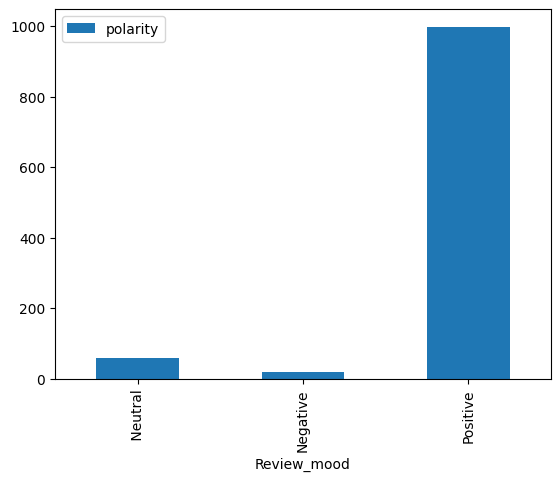

In [153]:
review_results[['Review_mood','polarity']].groupby("Review_mood").count().plot(kind="bar")
